### First explore the dataset using a standard distribution (non-custom build) of yt

In [1]:
import yt
import h5py 
import numpy as np

In [2]:
f = h5py.File("/Users/madicken/Documents/denovo_datasets/kelly-denovo-forward.out.h5")

In [3]:
list(f["/denovo"].keys())

['block',
 'db',
 'diagnostics',
 'flux',
 'group_bounds_n',
 'log',
 'mesh_g',
 'mesh_x',
 'mesh_y',
 'mesh_z',
 'peak_memory',
 'properties',
 'quadrature_angles',
 'quadrature_weights',
 'silo_output',
 'source',
 'timers']

In [4]:
yt.load_hexahedral_mesh

<function yt.frontends.stream.data_structures.load_hexahedral_mesh>

In [5]:
mesh_g = f["/denovo/mesh_g"][:]
mesh_x = f["/denovo/mesh_x"][:]
mesh_y = f["/denovo/mesh_y"][:]
mesh_z = f["/denovo/mesh_z"][:]
coords, conn = yt.hexahedral_connectivity(mesh_x, mesh_y, mesh_z)
bbox = np.array([[mesh_x.min(), mesh_x.max()], [mesh_y.min(), mesh_y.max()], [mesh_z.min(), mesh_z.max()]])

In [6]:
flux = f["/denovo/flux"][:]
data = { 'group_%03i' % i : flux[i,...].transpose() for i in range(27)}

In [7]:
ds = yt.load_hexahedral_mesh(data, conn, coords, bbox= np.array([[mesh_x.min(), mesh_x.max()], [mesh_y.min(), mesh_y.max()], [mesh_z.min(), mesh_z.max()]]))

yt : [INFO     ] 2018-04-09 16:10:16,764 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-04-09 16:10:16,765 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2018-04-09 16:10:16,767 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-04-09 16:10:16,768 Parameters: domain_right_edge         = [  53.   50.  140.]
yt : [INFO     ] 2018-04-09 16:10:16,770 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2018-04-09 16:10:20,065 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-09 16:10:20,066 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-09 16:10:20,068 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-09 16:10:20,069 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-09 16:10:20,077 Making a fixed resolution buffer of (('stream', 'group_000')) 800 by 800



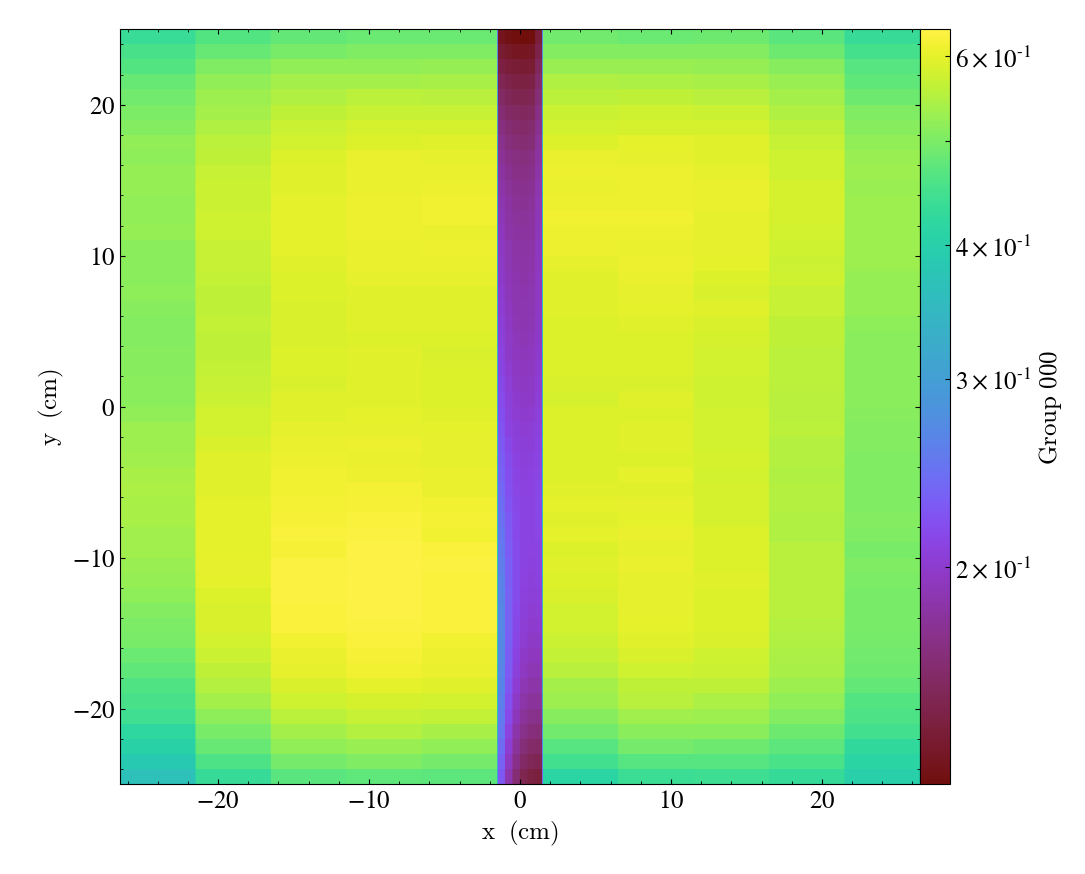

In [8]:
yt.SlicePlot(ds, "z", "group_000")

In [9]:
import ipywidgets

In [10]:
@ipywidgets.interact(group = (0, 27, 1))
def make_slice(group = 0):
    s = yt.SlicePlot(ds, "z", "group_%03i" % group)
    s.show()

interactive(children=(IntSlider(value=0, description='group', max=27), Output()), _dom_classes=('widget-interact',))

In [26]:
ds.all_data()

YTRegion (HexahedralMeshData): , center=[ 26.5  25.   70. ] cm, left_edge=[ 0.  0.  0.] cm, right_edge=[  53.   50.  140.] cm

In [27]:
ds.unit_system

cgs Unit System
 Base Units:
  length: cm
  mass: g
  time: s
  temperature: K
  angle: rad
 Other Units:
  energy: erg
  specific_energy: erg/g
  pressure: dyne/cm**2
  force: dyne
  magnetic_field_cgs: gauss
  charge_cgs: esu
  current_cgs: statA

In [31]:
ds.parameters

{'CosmologyCurrentRedshift': 1.0,
 'CosmologyHubbleConstantNow': 1.0,
 'CurrentTimeIdentifier': 1522088945.5015209,
 'EOSType': -1,
 'HydroMethod': -1}

In [34]:
ds.field_list

[('stream', 'group_000'),
 ('stream', 'group_001'),
 ('stream', 'group_002'),
 ('stream', 'group_003'),
 ('stream', 'group_004'),
 ('stream', 'group_005'),
 ('stream', 'group_006'),
 ('stream', 'group_007'),
 ('stream', 'group_008'),
 ('stream', 'group_009'),
 ('stream', 'group_010'),
 ('stream', 'group_011'),
 ('stream', 'group_012'),
 ('stream', 'group_013'),
 ('stream', 'group_014'),
 ('stream', 'group_015'),
 ('stream', 'group_016'),
 ('stream', 'group_017'),
 ('stream', 'group_018'),
 ('stream', 'group_019'),
 ('stream', 'group_020'),
 ('stream', 'group_021'),
 ('stream', 'group_022'),
 ('stream', 'group_023'),
 ('stream', 'group_024'),
 ('stream', 'group_025'),
 ('stream', 'group_026')]

In [35]:
if 'group_000' in ds.field_list:
    print("field found")
else:
    print("field not found")

field not found


In [37]:
type(ds.field_list[0][1])

str

In [39]:
ds.field_dependencies

{('gas',
  'cell_volume'): FieldDetector(<function yt.fields.field_detector.FieldDetector.__init__.<locals>.<lambda>>, {('gas',
                 'cell_volume'): YTArray([[[ 0.00024414,  0.00024414,  0.00024414, ...,  0.00024414,
                          0.00024414,  0.00024414],
                        [ 0.00024414,  0.00024414,  0.00024414, ...,  0.00024414,
                          0.00024414,  0.00024414],
                        [ 0.00024414,  0.00024414,  0.00024414, ...,  0.00024414,
                          0.00024414,  0.00024414],
                        ..., 
                        [ 0.00024414,  0.00024414,  0.00024414, ...,  0.00024414,
                          0.00024414,  0.00024414],
                        [ 0.00024414,  0.00024414,  0.00024414, ...,  0.00024414,
                          0.00024414,  0.00024414],
                        [ 0.00024414,  0.00024414,  0.00024414, ...,  0.00024414,
                          0.00024414,  0.00024414]],
                
 

In [81]:
params = {}
for key in f["/denovo"].keys():
    checkobj = f["/denovo/{}".format(key)]
    # print("/denovo/{}".format(key))
    if isinstance(checkobj, h5py.Dataset):
        print("Dataset is {}".format(key))
        params[key]=checkobj.value
    if isinstance(checkobj, h5py.Group):
        print("Group is {}".format(key))
    # if 'mesh' in key:
        # print(key)

Dataset is block
Group is db
Group is diagnostics
Dataset is flux
Dataset is group_bounds_n
Dataset is log
Dataset is mesh_g
Dataset is mesh_x
Dataset is mesh_y
Dataset is mesh_z
Dataset is peak_memory
Group is properties
Dataset is quadrature_angles
Dataset is quadrature_weights
Dataset is silo_output
Dataset is source
Dataset is timers


In [95]:
params = {}
for key,val in f["/denovo"].items():
    # checkobj = f["/denovo/{}".format(key)]
    # print("/denovo/{}".format(key))
    if isinstance(val, h5py.Dataset):
        if any([key == 'flux', key == 'source']):
            pass
        else:
            print("Dataset is {}".format(key))
            params[key]=val.value
            # params[key]=f["/denovo/{}".format(key)].value
    if isinstance(val, h5py.Group):
        print("Group is {}".format(key))
    # if 'mesh' in key:
        # print(key)

Dataset is block
Group is db
Group is diagnostics
Dataset is group_bounds_n
Dataset is log
Dataset is mesh_g
Dataset is mesh_x
Dataset is mesh_y
Dataset is mesh_z
Dataset is peak_memory
Group is properties
Dataset is quadrature_angles
Dataset is quadrature_weights
Dataset is silo_output
Dataset is timers


In [93]:
print(params.keys())

dict_keys(['block', 'group_bounds_n', 'log', 'mesh_g', 'mesh_x', 'mesh_y', 'mesh_z', 'peak_memory', 'quadrature_angles', 'quadrature_weights', 'silo_output', 'timers'])


In [97]:
print(params['mesh_x'])

[  0.    5.   10.   15.   20.   25.   25.5  26.   26.5  27.   27.5  28.
  33.   38.   43.   48.   53. ]


In [59]:
log = f["/denovo/group_bounds_n"][:]
print(log)

[  2.00000000e+07   6.37630000e+06   3.01190000e+06   1.82680000e+06
   1.42270000e+06   9.07180000e+05   4.07620000e+05   1.11090000e+05
   1.50340000e+04   3.03540000e+03   5.82950000e+02   1.01300000e+02
   2.90230000e+01   1.06770000e+01   3.05900000e+00   1.85540000e+00
   1.30000000e+00   1.12530000e+00   1.00000000e+00   8.00000000e-01
   4.13990000e-01   3.25000000e-01   2.25000000e-01   1.00000000e-01
   5.00000000e-02   3.00000000e-02   1.00000000e-02   1.00000000e-05]


Note: The items in /denovo/db seem to list which fields can be read in. But they are not guaranteed to have the dimensionality of the fields that we will plot yet. 

In [101]:
denovodb = {}
for key,val in f["/denovo/db/hdf5_db"].items():
    print(key, val.value)

angular_flux False
angular_mesh True
block True
current False
flux True
mat False
source True


In [115]:
flist = [("denovo", key) for key, val in f["/denovo/db/hdf5_db"].items() if val.value]

In [116]:
print(flist)

[('denovo', 'angular_mesh'), ('denovo', 'block'), ('denovo', 'flux'), ('denovo', 'source')]


In [119]:
if ('denovo','angular_mesh') in flist:
    print('found it!')

found it!


In [131]:
group0 = f["/denovo/flux"][0,:].transpose()

In [132]:
np.shape(group0)

(16, 50, 65)

In [125]:
type(group0)

numpy.ndarray

In [127]:
np.shape(data['group_000'])

(16, 50, 65)

In [129]:
group00= group0.transpose()

In [130]:
np.shape(group00)

(16, 50, 65)

In [133]:
poo = data['dogs']

KeyError: 'dogs'

### Now try loading a custom build with my new frontend

In [1]:
import yt
import h5py 
import numpy as np

In [2]:
kfile = "/Users/madicken/Documents/denovo_datasets/kelly-denovo-forward.out.h5"

In [3]:
ds = yt.load(kfile)

yt : [INFO     ] 2018-04-09 16:01:08,631 calculating domain boundaries
yt : [INFO     ] 2018-04-09 16:01:08,642 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-04-09 16:01:08,643 Parameters: domain_dimensions         = [  53.   50.  140.]
yt : [INFO     ] 2018-04-09 16:01:08,644 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-04-09 16:01:08,646 Parameters: domain_right_edge         = [  53.   50.  140.]
yt : [INFO     ] 2018-04-09 16:01:08,647 Parameters: cosmological_simulation   = 0


In [4]:
ds.parameters.keys()

dict_keys(['block', 'group_bounds_n', 'log', 'mesh_g', 'mesh_x', 'mesh_y', 'mesh_z', 'peak_memory', 'quadrature_angles', 'quadrature_weights', 'silo_output', 'timers'])

In [5]:
ds.parameters['mesh_x']

array([  0. ,   5. ,  10. ,  15. ,  20. ,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  33. ,  38. ,  43. ,  48. ,  53. ])

In [6]:
ds.field_list

[('denovo', 'flux'), ('denovo', 'source')]

yt : [INFO     ] 2018-04-09 16:01:12,968 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-09 16:01:12,969 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-09 16:01:12,970 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-09 16:01:12,971 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-09 16:01:12,980 Making a fixed resolution buffer of (('denovo', 'flux')) 800 by 800



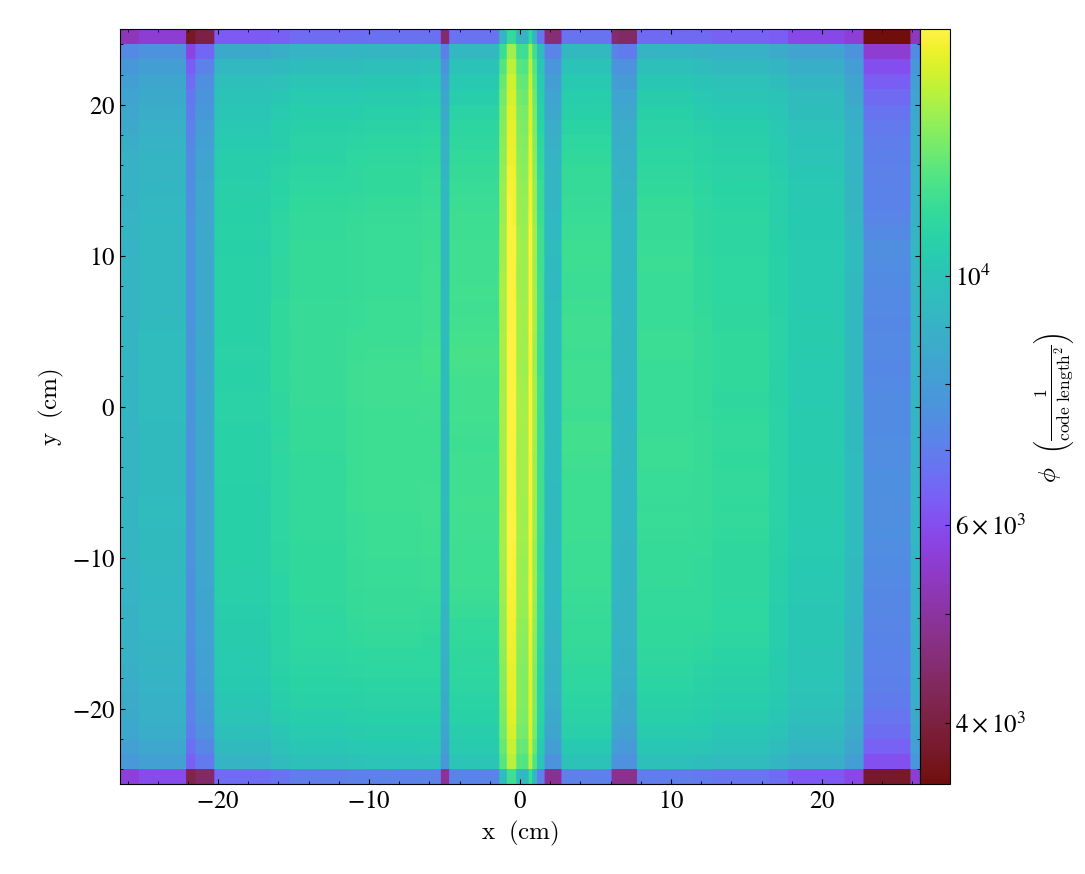

In [7]:
yt.SlicePlot(ds, "z", "flux")

yt : [INFO     ] 2018-04-09 16:04:32,881 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-09 16:04:32,882 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-09 16:04:32,884 xlim = 0.000000 53.000000
yt : [INFO     ] 2018-04-09 16:04:32,885 ylim = 0.000000 50.000000
yt : [INFO     ] 2018-04-09 16:04:32,887 Making a fixed resolution buffer of (('denovo', 'source')) 800 by 800



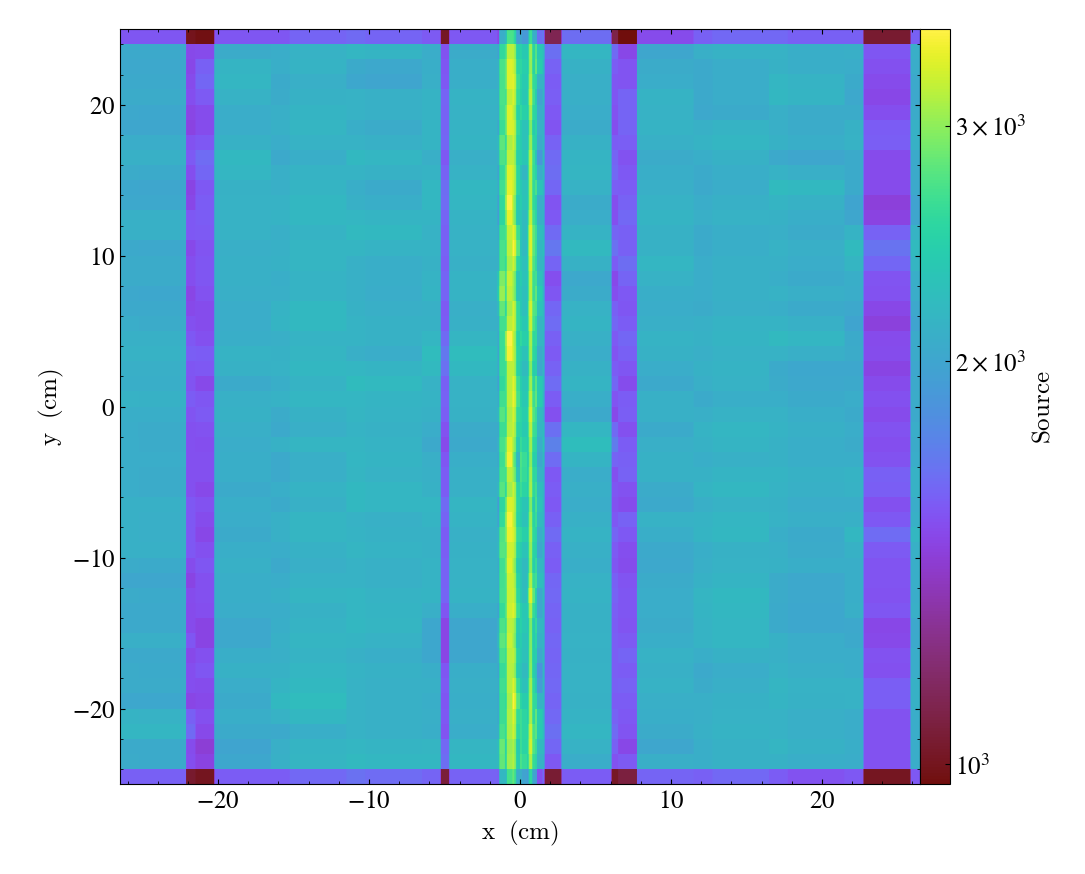

In [8]:
yt.SlicePlot(ds, "z", "source")